# 13강. 인기 검색어

## text 데이터에 대한 기본 정보 확인
- 대부분의 로그 데이터는 깨끗하지 않고 여러 노이즈가 섞여 있다
- 다양한 방법을 통하여 클랜징을 할 필요성에 있다

In [1]:
import pandas as pd
df = pd.read_csv('./data/sample_impression.log', sep='\t', header=None, names = ['date', 'uid', 'pqid', 'purl', 'cqid', 'curl', 'imp'])
df.head(5)

,date,uid,pqid,purl,cqid,curl,imp
0,1320308298,5e9bc391d094fe24adee56d08facd11f,f4be22ca-8470-488f-910e-406242b58e9d,https://search.daum.net/search?w=tot&q=아스날 자켓,839630d6-62d5-4ed7-a82f-4d56c5b1361c,https://search.daum.net/search?w=tot&q=아스날 바람막이,"[25, 1306, 2525]"
1,1320308152,2ed6a3af4e170bafba6c79759c33185b,-1,NaN,1f85864e-7cc5-4c3f-9fda-fddc2d910ed7,https://www.google.com/search?q=여자아이돌 대마초,[]
2,1320305176,ee7300e3fe3c7554a3489855dc70b487,-1,NaN,2f6eb563-7cf0-41b5-a8e2-068e9266f2c7,https://search.naver.com/search.naver?sm=top_h...,"[544, 843, 333, 1621, 669]"
3,1320308083,b68dc9cc665b44b81175b4b09d30ebce,-1,NaN,38c6bbb4-6526-4d3e-b6fb-6423af945bee,https://www.google.com/search?q=닏ㅇ,"[296, 2250, 2978]"
4,1320289300,610c9e367f72d73db8f5cc2aff1dc3f0,e0587b1f-785a-4317-bf7a-ea736c399625,https://search.naver.com/search.naver?sm=top_h...,75fbe76b-33a6-4915-afd2-46584f60398b,https://search.naver.com/search.naver?sm=top_h...,"[1216, 1638, 1735, 1228, 76, 2385, 1683, 2582]"


In [2]:
#type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62801 entries, 0 to 62800
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62801 non-null  int64 
 1   uid     62798 non-null  object
 2   pqid    62801 non-null  object
 3   purl    14921 non-null  object
 4   cqid    62801 non-null  object
 5   curl    62801 non-null  object
 6   imp     62801 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.4+ MB


In [3]:
#데이터 기본 통계를 확인
df.describe()

,date
count,6.280100e+04
mean,1.320301e+09
std,2.184346e+04
min,1.320246e+09
25%,1.320288e+09
50%,1.320305e+09
75%,1.320319e+09
max,1.320332e+09


In [4]:
#date 형식이 long time 형식인 것을 확인할 수 있으니 date type으로 변경해보자
df['date'] = pd.to_datetime(df.date, unit='s', utc=True).dt.tz_convert('Asia/Seoul')

In [5]:
df = df[['date', 'uid', 'curl']]
df.head(10)

,date,uid,curl
0,2011-11-03 17:18:18+09:00,5e9bc391d094fe24adee56d08facd11f,https://search.daum.net/search?w=tot&q=아스날 바람막이
1,2011-11-03 17:15:52+09:00,2ed6a3af4e170bafba6c79759c33185b,https://www.google.com/search?q=여자아이돌 대마초
2,2011-11-03 16:26:16+09:00,ee7300e3fe3c7554a3489855dc70b487,https://search.naver.com/search.naver?sm=top_h...
3,2011-11-03 17:14:43+09:00,b68dc9cc665b44b81175b4b09d30ebce,https://www.google.com/search?q=닏ㅇ
4,2011-11-03 12:01:40+09:00,610c9e367f72d73db8f5cc2aff1dc3f0,https://search.naver.com/search.naver?sm=top_h...
5,2011-11-03 17:14:30+09:00,384ddf4d834c8af2f93e817f4477a911,https://www.google.com/search?q=신수지 징계
6,2011-11-03 17:26:04+09:00,384ddf4d834c8af2f93e817f4477a911,https://search.daum.net/search?w=tot&q=피자
7,2011-11-03 17:18:36+09:00,3a4bf898c15ecb9491415cf37710ba53,https://search.naver.com/search.naver?sm=top_h...
8,2011-11-03 17:09:55+09:00,08a3c060769f97bbb87761b1f15c704c,http://search.zum.com/search.zum?query=딸기노트5
9,2011-11-03 17:20:15+09:00,f071fb9af088199988ba730515483f0c,https://search.naver.com/search.naver?sm=top_h...


In [6]:
# 현재 query를 획득
df['keyword'] = df.curl.map(lambda url: url.split('=')[-1])
df = df[['date', 'uid', 'keyword']]
df.head(10)

,date,uid,keyword
0,2011-11-03 17:18:18+09:00,5e9bc391d094fe24adee56d08facd11f,아스날 바람막이
1,2011-11-03 17:15:52+09:00,2ed6a3af4e170bafba6c79759c33185b,여자아이돌 대마초
2,2011-11-03 16:26:16+09:00,ee7300e3fe3c7554a3489855dc70b487,어노잉 오렌지
3,2011-11-03 17:14:43+09:00,b68dc9cc665b44b81175b4b09d30ebce,닏ㅇ
4,2011-11-03 12:01:40+09:00,610c9e367f72d73db8f5cc2aff1dc3f0,hp 올인원pc
5,2011-11-03 17:14:30+09:00,384ddf4d834c8af2f93e817f4477a911,신수지 징계
6,2011-11-03 17:26:04+09:00,384ddf4d834c8af2f93e817f4477a911,피자
7,2011-11-03 17:18:36+09:00,3a4bf898c15ecb9491415cf37710ba53,제너시스가격
8,2011-11-03 17:09:55+09:00,08a3c060769f97bbb87761b1f15c704c,딸기노트5
9,2011-11-03 17:20:15+09:00,f071fb9af088199988ba730515483f0c,안혜경


In [7]:
#한명당 검색어를 어느정도 입력하는지 다양한 방법으로 알아볼 수 있다
grouped = df.groupby(by='uid').count().sort_values(by=['keyword', 'date'], ascending=False)
grouped.head(5)

,date,keyword
uid,,
ffe1489725ef504ef8938f2fe192f2a7,29,29
1921ec67ed6c4bb1a13b028ee6dbd111,28,28
35b9ab5a36f3234dd26db357fd4a0dc1,16,16
ac7b8d212a51cec296bd3f2b03969c37,13,13
c223710e267c997aa9e81703e560b1c3,12,12


In [8]:
print('인당 검색쿼리/median:', grouped.median())
print()
print('인당 검색쿼리/mean:', grouped.mean())

인당 검색쿼리/median: date       1.0
keyword    1.0
dtype: float64

인당 검색쿼리/mean: date       1.099848
keyword    1.099848
dtype: float64


In [9]:
#데이터의 시작 날짜와 끝 날짜를 확인해보자
print ( df.date.min() )
print ( df.date.max() )

2011-11-03 00:00:00+09:00
2011-11-03 23:59:41+09:00


In [10]:
#날짜에 색인을 걸고 시각화를 해보자
df = df.set_index('date')

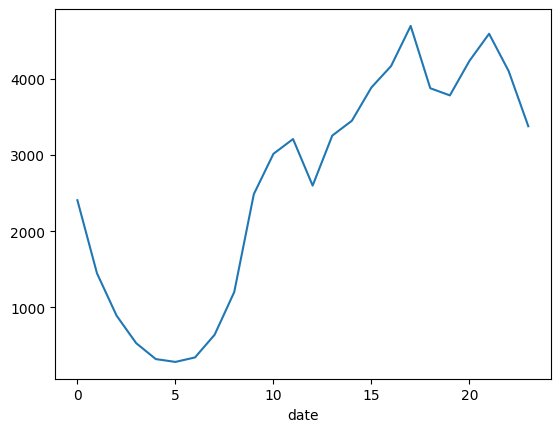

In [11]:
import matplotlib.pyplot as plt
df.groupby(by=df.index.hour)['keyword'].count().plot()
plt.show()

In [12]:
# keyword 길이에 대한 기본통계를 출력해보자
df.keyword.map(str).map(len).describe()

count    62801.000000
mean         6.817041
std          4.390660
min          0.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        232.000000
Name: keyword, dtype: float64

In [13]:
#100 글자가 넘는 keyword들이 무엇인지 확인해보자
df[df.keyword.map(str).map(len) > 100][:5]

,uid,keyword
date,,
2011-11-03 14:40:38+09:00,aeff14936a91b2406762fb89645f1631,"삼국 이전에는 과거의 법이 없었고, 고려 태조가 처음으로 학교를 세웠으나 과거로 인..."
2011-11-03 20:38:09+09:00,84796f2f22828a433563e24b3e76a0a1,-.-* ...
2011-11-03 03:09:31+09:00,5b78f7b1a932705887f547b46e406025,Treating its people with respect by respecting...
2011-11-03 20:23:04+09:00,d2e1025466b7c0575288ca9bfff40041,"drawn to these new, refreshing conceptions of ..."


* 전체 PV와 UV를 구해보자

* 특정 키워드에 대한 PV와 UV를 구해보자
 * pv_by_keyword(키워드) = pv, uv_by_keyword(키워드) = uv

## pandas를 이용한 mapReduce를 활용하지 않는 인기검색어
- 인기 검색어를 pandas를 이용하여 구현하여보자
- 인기 검색어는 windows size가 존재하는 것을 제외하면 word counter와 핵심로직을 90% 이상 공유함

In [14]:
import pandas as pd

def log_streamer(path, window_size = 5):
    import csv
    df = pd.read_csv(path, sep='\t', header=None, names = ['date', 'uid', 'pqid', 'purl', 'cqid', 'curl', 'imp'])
    df = df[['date', 'uid', 'curl']]
    df['date'] = pd.to_datetime(df.date, unit='s', utc=True).dt.tz_convert('Asia/Seoul')
    df['keyword'] = df.curl.map(lambda url: url.split('=')[-1])
    df = df[['date', 'uid', 'keyword']]
    df = df.set_index('date').sort_index()
    
    current_timestamp = df.index[0]
    while current_timestamp < df.index[-1]:
        next_timestamp = current_timestamp + pd.DateOffset(minutes=window_size)
        window_df = df[current_timestamp:next_timestamp]
        yield window_df
        current_timestamp = next_timestamp

window_df = log_streamer('./data/sample_impression.log')

##### 스트리밍 로그 출력
- 실제 서비스 단에서는 주어진 window 사이즈의 데이터가 실시간 혹은 파일 시스템에 주기적으로 저장됨
- 위의 상황을 모사하여, 호출하면 연속된 window 사이즈의 데이터를 순차적으로 출력하는 스트림을 생성
- next(스트림)을 호출하면 5분 단위씩의 window 사이즈의 데이터를 출력함


In [15]:
# 처음 5분의 데이터 2011-11-03 00:00:00 ~ 2011-11-03 00:05:00
next(window_df)[:5]

,uid,keyword
date,,
2011-11-03 00:00:00+09:00,93ac87adba3c3e7e0dae915701884f87,잭다니엘 로고 ai
2011-11-03 00:00:00+09:00,e87fa94638891f3ed8737abf368e06e5,B형성격
2011-11-03 00:00:02+09:00,19496de2510dce7bc2882b0b26071112,옵티머스패드
2011-11-03 00:00:03+09:00,11cffdb7f159245a9bb549580ca6aec2,1995
2011-11-03 00:00:03+09:00,8d6319d5e5f384c301376831bc4bdab9,쿠팡


In [16]:
# 다음 5분의 데이터 2011-11-03 00:05:00 ~ 2011-11-03 00:10:00
next(window_df)[:5]

,uid,keyword
date,,
2011-11-03 00:05:00+09:00,977dc555540ccc221abb60872121baad,독서대
2011-11-03 00:05:00+09:00,7baed4e27173fe5ffb8003b8fab12db5,tesat 기출문제
2011-11-03 00:05:04+09:00,34233c04b44596a27cefc1b637ab9516,apu e-350
2011-11-03 00:05:09+09:00,05175139763eb942655f1055ee25529a,갤럭시노트 kt
2011-11-03 00:05:10+09:00,e69d974845539a12b8f71045a329028e,윤은혜


##### window 사이즈의 데이터에 대한 word cnt
- 인기 검색어는 주어진 시간에 대한 word count를 높은 순서대로 정렬한 것과 거의 완벽히 동일함
- 단순히 주어진 window에 word count를 구현해보자

In [17]:
# window만큼의 df를 keyword로 그룹 한 뒤 count를 집계 후 집계된 cnt를 내림 차순 정렬
# 그럼 해당 기간 동안 인기가 많았던 키워드를 획득 가능
window_df_tmp = next(window_df)
current_tmp = window_df_tmp.groupby('keyword').count().rename(columns={'uid':'cnt'}).sort_values(by='cnt', ascending=False)
current_tmp['rank'] = current_tmp.cnt.rank(method='first', ascending=False)
current_tmp = current_tmp[:10]
current_tmp

,cnt,rank
keyword,,
소이,2,1.0
한 사람이 보이면 솔로,2,2.0
진지희,2,3.0
하하,2,4.0
다음,2,5.0
홀리 헨더슨,2,6.0
스파킹메테오 기술,1,7.0
영화비평사이트,1,8.0
오핀,1,9.0


In [18]:
# 과거 데이터를 previous로 저장 후 지금 시간의 current 데이터를 추가로 획득
previous_tmp = current_tmp
window_df_tmp = next(window_df)
current_tmp = window_df_tmp.groupby('keyword').count().rename(columns={'uid':'cnt'}).sort_values(by='cnt', ascending=False)
current_tmp['rank'] = current_tmp.cnt.rank(method='first', ascending=False)
current_tmp = current_tmp[:10]
previous_tmp

,cnt,rank
keyword,,
소이,2,1.0
한 사람이 보이면 솔로,2,2.0
진지희,2,3.0
하하,2,4.0
다음,2,5.0
홀리 헨더슨,2,6.0
스파킹메테오 기술,1,7.0
영화비평사이트,1,8.0
오핀,1,9.0


In [19]:
current_tmp

,cnt,rank
keyword,,
소녀시대 라디오 인증,3,1.0
강민경 셀카,3,2.0
권소현 직장인 느낌,3,3.0
박명수 부인,2,4.0
한 사람이 보이면 솔로,2,5.0
목욕의신,2,6.0
2011년 11월 3일 해외축구 경기,1,7.0
윤이정,1,8.0
와이지엔터테인먼트,1,9.0


In [20]:
#과거 데이터의 column 이름을 변경해줌 (필수 작업은 아님)
# 현재 데이터와 조인함
previous_tmp = previous_tmp.rename(columns={'cnt':'old_cnt', 'rank':'old_rank'})
current_tmp = current_tmp.join(previous_tmp, on='keyword', how='outer')
current_tmp

,keyword,cnt,rank,old_cnt,old_rank
소녀시대 라디오 인증,소녀시대 라디오 인증,3.0,1.0,NaN,NaN
강민경 셀카,강민경 셀카,3.0,2.0,NaN,NaN
권소현 직장인 느낌,권소현 직장인 느낌,3.0,3.0,NaN,NaN
박명수 부인,박명수 부인,2.0,4.0,NaN,NaN
한 사람이 보이면 솔로,한 사람이 보이면 솔로,2.0,5.0,2.0,2.0
목욕의신,목욕의신,2.0,6.0,NaN,NaN
2011년 11월 3일 해외축구 경기,2011년 11월 3일 해외축구 경기,1.0,7.0,NaN,NaN
윤이정,윤이정,1.0,8.0,NaN,NaN
와이지엔터테인먼트,와이지엔터테인먼트,1.0,9.0,NaN,NaN
와일드에이지 펫종류,와일드에이지 펫종류,1.0,10.0,NaN,NaN


In [21]:
# 과거 rank와 지금 rank를 비교하여 상승/하락폭을 구함
# 신규 진입한 keyword는 NaN이기 때문에 수치연산에 반응하지 않음
current_tmp['step'] = current_tmp['old_cnt'] - current_tmp['old_rank']
current_tmp = current_tmp[:10]
current_tmp

,keyword,cnt,rank,old_cnt,old_rank,step
소녀시대 라디오 인증,소녀시대 라디오 인증,3.0,1.0,NaN,NaN,NaN
강민경 셀카,강민경 셀카,3.0,2.0,NaN,NaN,NaN
권소현 직장인 느낌,권소현 직장인 느낌,3.0,3.0,NaN,NaN,NaN
박명수 부인,박명수 부인,2.0,4.0,NaN,NaN,NaN
한 사람이 보이면 솔로,한 사람이 보이면 솔로,2.0,5.0,2.0,2.0,0.0
목욕의신,목욕의신,2.0,6.0,NaN,NaN,NaN
2011년 11월 3일 해외축구 경기,2011년 11월 3일 해외축구 경기,1.0,7.0,NaN,NaN,NaN
윤이정,윤이정,1.0,8.0,NaN,NaN,NaN
와이지엔터테인먼트,와이지엔터테인먼트,1.0,9.0,NaN,NaN,NaN
와일드에이지 펫종류,와일드에이지 펫종류,1.0,10.0,NaN,NaN,NaN


In [22]:
# 해당 출력을 예쁘게 보이기 하기 위해서 field를 정리
# 해당 작업을 계속 반복하면 인기검색어 구현 완료
current_tmp = current_tmp[['rank', 'step']]
current_tmp

,rank,step
소녀시대 라디오 인증,1.0,NaN
강민경 셀카,2.0,NaN
권소현 직장인 느낌,3.0,NaN
박명수 부인,4.0,NaN
한 사람이 보이면 솔로,5.0,0.0
목욕의신,6.0,NaN
2011년 11월 3일 해외축구 경기,7.0,NaN
윤이정,8.0,NaN
와이지엔터테인먼트,9.0,NaN
와일드에이지 펫종류,10.0,NaN


### 완성된 인기검색어 로직 (pandas ver)

In [23]:
import pandas as pd
    
def log_streamer(path, window_size = 5):
    import csv
    df = pd.read_csv(path, sep='\t', header=None, names = ['date', 'uid', 'pqid', 'purl', 'cqid', 'curl', 'imp'])
    df = df[['date', 'uid', 'curl']]
    df['date'] = pd.to_datetime(df.date, unit='s', utc=True).dt.tz_convert('Asia/Seoul')
    df['keyword'] = df.curl.map(lambda url: url.split('=')[-1])
    df = df[['date', 'uid', 'keyword']]
    df = df.set_index('date').sort_index()
    
    previous = pd.DataFrame(columns=['keyword', 'old_rank'])
    current_timestamp = df.index[0]
    while current_timestamp < df.index[-1]:
        next_timestamp = current_timestamp + pd.DateOffset(minutes=window_size)
        word_count = df[current_timestamp:next_timestamp]
        word_count = word_count.groupby(by='keyword').count().rename(columns={'uid':'cnt'}).sort_values(by='cnt', ascending=False)[:100]
        
        current = word_count.join(previous, on='keyword', how='outer', rsuffix='_right')
        current['rank'] = current.cnt.rank(method='first', ascending=False)
        current['step'] = current['old_rank'] - current['rank']
        current = current[['cnt', 'rank', 'step']][:100]
        
        yield current, previous
        previous = current.rename(columns={'rank':'old_rank'})[:100]

        current_timestamp = next_timestamp

stream = log_streamer('./data/sample_impression.log')

In [ ]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

text = widgets.Text()

def handle_submint(sender):
    clear_output()
    display(text)
    for k, v in get_top(30)[0].iterrows():
        print (k, v[1], str(v[2]).replace('nan', 'NEW').replace('.0', ''))

#text.observe(handle_submint)
text.on_submit(handle_submint)

def get_top(rows=10):
    current, previous = next(stream)
    return current[:rows], previous[:rows]

/tmp/ipykernel_57994/1759938165.py:14: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  text.on_submit(handle_submint)


In [ ]:
display(text)

## spark를 이용한 mapReduce를 활용하는 인기 검색어
- 사실 인기검색어 정도의 단순한 데이터라면 map reduce가 절대적으로 필요한 것은 아니다
- 그러나 글로벌 서비스라고 가정한다면 한번쯤 구현해 볼 필요가 있을 수 있다

In [ ]:
import findspark; findspark.init()
import pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("SimpleTest").getOrCreate()
df = spark.sql('''select 'spark' as hello ''')
df.show(5)

In [ ]:
# 기본으로 사용될 df 로드
imp = spark.read.format('text').format("csv").option("delimiter", "\t").load('sample_impression.log')
imp = imp.toDF(*['date', 'user', 'pqid', 'purl', 'cqid', 'curl', 'dids'])
imp = imp.withColumn("date", imp["date"].cast("long"))
imp.show(10)

In [ ]:
# 스키마 확인
imp.printSchema()

In [ ]:
# long type date를 date 객체로 변경
from pyspark.sql.functions import unix_timestamp, from_unixtime
imp = imp.withColumn("date", from_unixtime(imp['date']))
imp.show(10)

In [ ]:
# 스키마 확인
imp.printSchema()

In [ ]:
# 최대, 최소 시간 확인
print(imp.select('date').rdd.min())
print(imp.select('date').rdd.max())

In [ ]:
# 데이터 타입으로 변경
imp = imp.withColumn("date", imp["date"].cast("timestamp"))
imp.printSchema()

In [ ]:
# 쿼리 획득 udf 설정
from pyspark.sql import functions as func
from pyspark.sql import types

get_query = func.udf(lambda url: url.split('=')[-1], types.StringType())

In [ ]:
imp = imp.withColumn("keyword", get_query(imp["curl"]))
imp.show(10)

In [ ]:
# 필수 col만 남겨둠
imp = imp.select(['date', 'user', 'keyword'])
imp.show(10)

In [ ]:
#지정된 윈도우 사이즈의 데이터를 확보함
import  datetime
from pyspark.sql.functions import current_date, datediff, col
window_start = datetime.datetime.strptime('2011-11-03 00:00:00', '%Y-%m-%d %H:%M:%S')
window_end = datetime.datetime.strptime('2011-11-03 00:05:00', '%Y-%m-%d %H:%M:%S')

window = imp.rdd.filter(lambda row: window_start <=  row.date <= window_end).toDF()
window.show(5)

In [ ]:
#keyword 별로 group 한 뒤 word count를 집계
win_count = window.groupBy('keyword').count()
win_count.show(5)

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id, lit
# 내림 차순 정렬 후 100개로 데이터 줄이고 순위를 부여함
win_count = win_count.orderBy('count', ascending=False).limit(100).withColumn("rank", lit(1) + monotonically_increasing_id())
win_count.show(4)

In [ ]:
#사용할 필드인 keyword와 rank만 남김
win_count = win_count.select(['keyword', 'rank'])
win_count.show(5)

In [ ]:
#step을 표현하기 위한 old popular df를 생성
old_popular = spark.sparkContext.parallelize([['', 0]]).toDF(['keyword', 'old_rank'])
old_popular.show(5)

In [ ]:
#기존 데이터와 조인을 한 후
win_count = win_count.join(old_popular, on='keyword', how='left')
win_count.show(5)

In [ ]:
#step 계산을 처리해준다
win_count = win_count.withColumn('step', col('old_rank') - col('rank')).select(['keyword', 'rank', 'step']).orderBy('rank')
win_count.show(5)

In [ ]:
#최종적으로 df5를 old popular 처리를 해준 후 다시 수행하면 완료
old_popular = win_count.withColumnRenamed('rank', 'old_rank')

window_start = datetime.datetime.strptime('2011-11-03 00:05:00', '%Y-%m-%d %H:%M:%S')
window_end = datetime.datetime.strptime('2011-11-03 00:10:00', '%Y-%m-%d %H:%M:%S')

window = imp.rdd.filter(lambda row: window_start <=  row.date <= window_end).toDF()
window.show(10)

In [ ]:
window_count = window.groupBy('keyword').count()
window_count = window_count.orderBy('count', ascending=False).limit(100).withColumn("rank", 1 + monotonically_increasing_id())
window_count = window_count.select(['keyword', 'rank'])
window_count = window_count.join(old_popular, on='keyword', how='left')
window_count = window_count.withColumn('step', col('old_rank') - col('rank')).select(['keyword', 'rank', 'step']).orderBy('rank')
window_count.show(5)